# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
#url = "https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "https://api.openweathermap.org/data/2.5/weather?&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pihani
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | manokwari
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | ngetkib
Processing Record 6 of Set 1 | noshiro
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | namibe
Processing Record 9 of Set 1 | el alto
Processing Record 10 of Set 1 | nemuro
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | mildura
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | san miguel
Processing Record 17 of Set 1 | vadso
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | preston
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | muana
Processing Record 22 of Set 1 | sanniquellie
Processing Record 23 of Set 1 | luderitz
Proces

Processing Record 36 of Set 4 | bandiagara
Processing Record 37 of Set 4 | nogliki
Processing Record 38 of Set 4 | tiksi
Processing Record 39 of Set 4 | itoman
Processing Record 40 of Set 4 | ulladulla
Processing Record 41 of Set 4 | xiongzhou
Processing Record 42 of Set 4 | dawson creek
Processing Record 43 of Set 4 | zangguy
City not found. Skipping...
Processing Record 44 of Set 4 | bariri
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | sao vicente
Processing Record 47 of Set 4 | vallo della lucania
Processing Record 48 of Set 4 | badger
Processing Record 49 of Set 4 | ust-nera
Processing Record 0 of Set 5 | touros
Processing Record 1 of Set 5 | caleta de carquin
Processing Record 2 of Set 5 | kalianget
Processing Record 3 of Set 5 | lafia
Processing Record 4 of Set 5 | sterling
Processing Record 5 of Set 5 | moree
Processing Record 6 of Set 5 | steinbach
Processing Record 7 of Set 5 | kultali
City not found. Skipping...
Processing Record 8 of Set 5 | callao
P

Processing Record 24 of Set 8 | cabo san lucas
Processing Record 25 of Set 8 | tsiombe
Processing Record 26 of Set 8 | wajir
Processing Record 27 of Set 8 | piravam
Processing Record 28 of Set 8 | port lincoln
Processing Record 29 of Set 8 | newcastle
Processing Record 30 of Set 8 | nar'yan-mar
Processing Record 31 of Set 8 | haiku-pauwela
Processing Record 32 of Set 8 | thinadhoo
Processing Record 33 of Set 8 | butha-buthe
Processing Record 34 of Set 8 | freeport
Processing Record 35 of Set 8 | ponta delgada
Processing Record 36 of Set 8 | road town
Processing Record 37 of Set 8 | sinjai
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | mucur
Processing Record 40 of Set 8 | kiunga
Processing Record 41 of Set 8 | nago
Processing Record 42 of Set 8 | kenai
Processing Record 43 of Set 8 | mankoeng
Processing Record 44 of Set 8 | dembi dolo
Processing Record 45 of Set 8 | celestun
Processing Record 46 of Set 8 | cherdyn'
Processing Record 47 of Set 8 | kachug


City not found. Skipping...
Processing Record 16 of Set 12 | port hedland
Processing Record 17 of Set 12 | santo antonio
Processing Record 18 of Set 12 | dali
Processing Record 19 of Set 12 | the pas
Processing Record 20 of Set 12 | enewetak
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pihani,27.6333,80.2000,37.22,42,93,2.80,IN,1690879490
1,blackmans bay,-43.0167,147.3167,8.16,74,38,2.32,AU,1690879490
2,manokwari,-0.8667,134.0833,27.69,78,47,1.44,ID,1690879491
3,jamestown,42.0970,-79.2353,13.73,100,75,1.54,US,1690879491
4,ngetkib,7.3645,134.5148,28.14,89,75,3.09,PW,1690879492


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pihani,27.6333,80.2000,37.22,42,93,2.80,IN,1690879490
1,blackmans bay,-43.0167,147.3167,8.16,74,38,2.32,AU,1690879490
2,manokwari,-0.8667,134.0833,27.69,78,47,1.44,ID,1690879491
3,jamestown,42.0970,-79.2353,13.73,100,75,1.54,US,1690879491
4,ngetkib,7.3645,134.5148,28.14,89,75,3.09,PW,1690879492


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

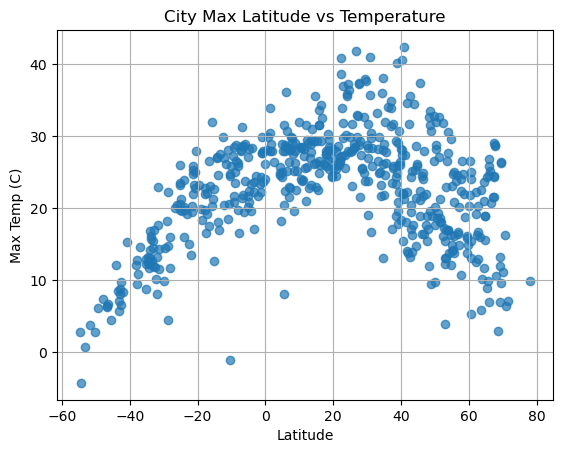

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", alpha=0.7, label="city")


# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

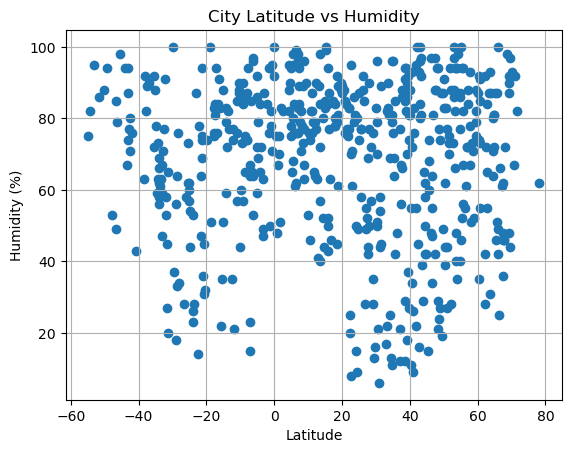

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", alpha=1.0, label="city")
# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

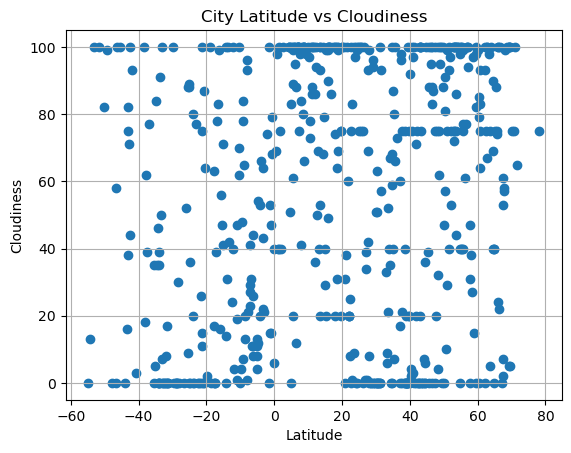

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", alpha=1.0, label="city")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

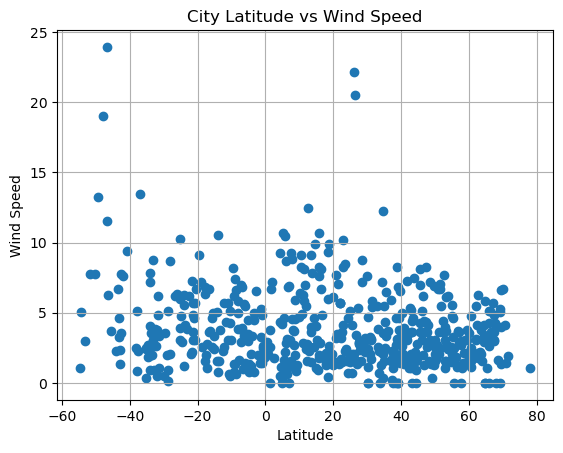

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", alpha=1.0, label="city")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Calculate the slope, intercept, rvalue, pvalue, and standard error of the linear regression.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the predicted y-values based on the linear regression.
    regress_values = x_values * slope + intercept
    
   # Create a string representation of the linear equation to be displayed on the plot.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Scatter plot the original data points.
    plt.scatter(x_values, y_values)
    
   # Plot the linear regression line.
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the linear equation text.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Set the x-axis label to "Latitude".
    plt.xlabel("Latitude")
    
    # Set the y-axis label to the specified title.
    plt.ylabel(title)
    
    # Print the coefficient of determination (r-squared) to the console.
    print(f"The r-value is: {rvalue**2}")
    
   
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pihani,27.6333,80.2000,37.22,42,93,2.80,IN,1690879490
3,jamestown,42.0970,-79.2353,13.73,100,75,1.54,US,1690879491
4,ngetkib,7.3645,134.5148,28.14,89,75,3.09,PW,1690879492
5,noshiro,40.2039,140.0242,27.46,81,92,1.54,JP,1690879492
6,bethel,41.3712,-73.4140,18.17,76,0,1.54,US,1690879492


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,8.16,74,38,2.32,AU,1690879490
2,manokwari,-0.8667,134.0833,27.69,78,47,1.44,ID,1690879491
7,namibe,-15.1961,12.1522,22.74,51,71,2.41,AO,1690879493
8,el alto,-4.2714,-81.2147,19.59,84,20,2.07,PE,1690879493
10,ushuaia,-54.8000,-68.3000,2.81,75,0,1.03,AR,1690879494


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.25853507367305795


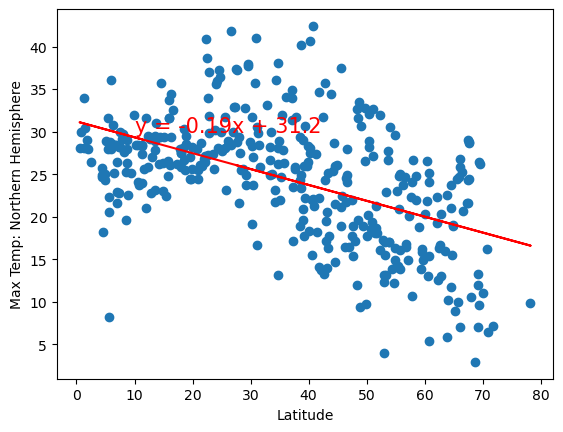

In [51]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
text_coordinates = (10, 30)

plot_linear_regression(x_values, y_values, title="Max Temp: Northern Hemisphere",
                       text_coordinates=text_coordinates)

The r-value is: 0.6586762622059289


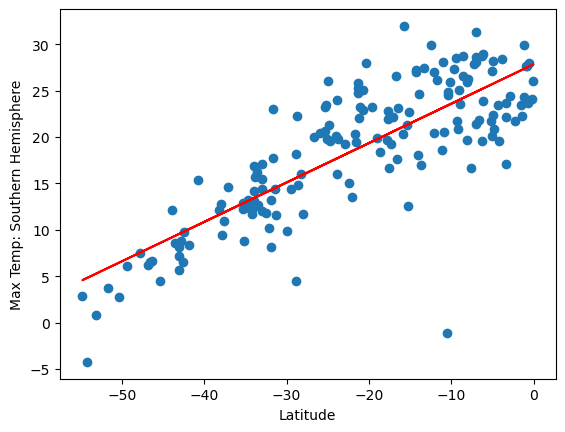

In [53]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
text_coordinates = (10, 30)


plot_linear_regression(x_values, y_values, title="Max Temp: Southern Hemisphere",
                       text_coordinates=text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [45]:
Discussion about the linear relationship: It seems that latitude and temperature have a correlation from one another. 
    For the Northern Hemisphere it seems like the plots have a downward trend as latitude increases. However, as for the
    Southern Hemisphere as the latitude increases the temperature increases. Northern Hemisphere temperature tends to be more random. 

SyntaxError: invalid syntax (594234352.py, line 1)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.008678392580383939


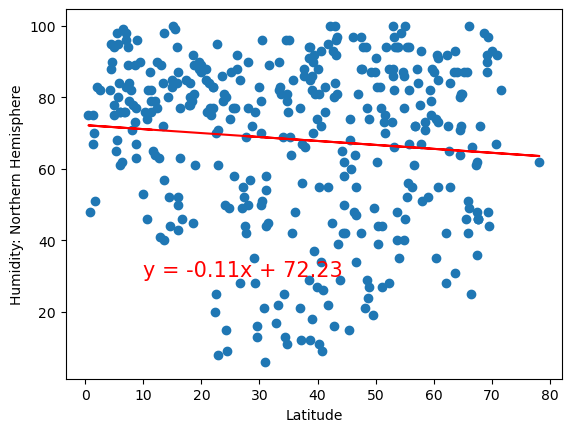

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
text_coordinates = (10, 30)

plot_linear_regression(x_values, y_values, title="Humidity: Northern Hemisphere",
                       text_coordinates=text_coordinates)

The r-value is: 0.0005093323460385578


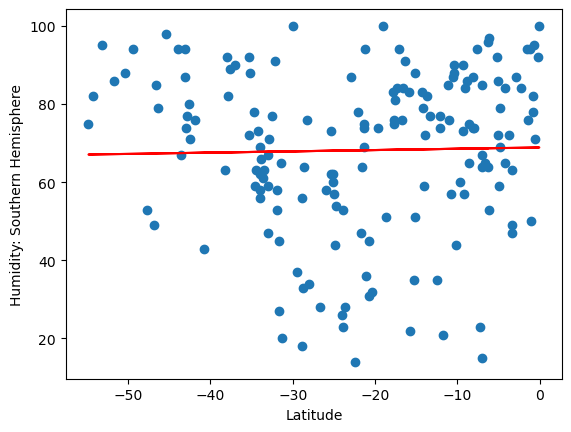

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
text_coordinates = (10,30)

plot_linear_regression(x_values, y_values, title="Humidity: Southern Hemisphere",
                       text_coordinates=text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Discussion about the linear relationship: Compared to temperature it seems as though humidity and latitude don't have as a strong
    relationship compared to temperature. In the Northern Hemipshere humidity tends to be above 80 in all parts of latitude. 
    As for the Southern Hemisphere there's seems to be a lack of a correlation between the two variables. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0094741545126297


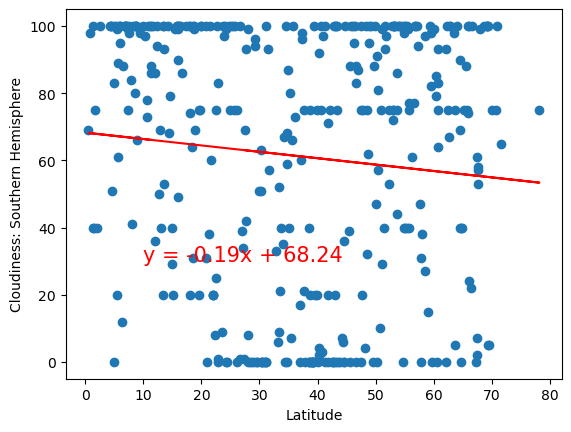

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, title="Cloudiness: Southern Hemisphere",
                       text_coordinates=text_coordinates)

The r-value is: 0.0027745323917804546


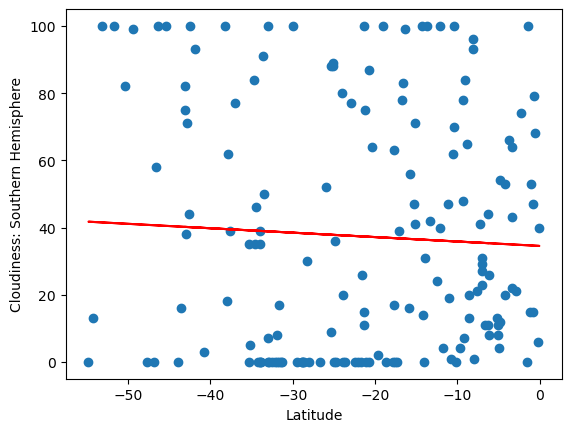

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
text_coordinates = (10,30)

plot_linear_regression(x_values, y_values, title="Cloudiness: Southern Hemisphere",
                       text_coordinates=text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Discussion about the linear relationship: It seems that cloudiness tends to be more prevalent in the Northern Hemisphere. 
    Looks to be that there is no correlation between the latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.027142223374185318


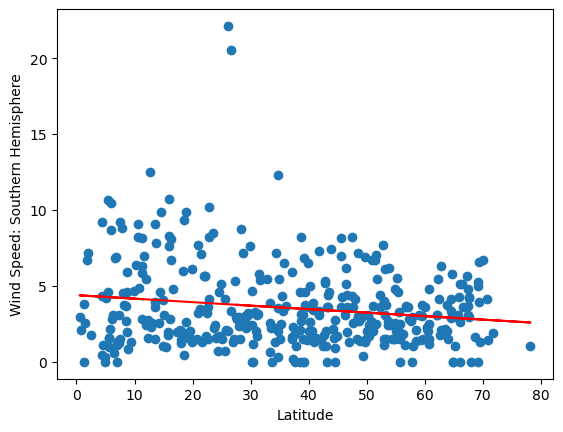

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, title="Wind Speed: Southern Hemisphere",
                       text_coordinates=text_coordinates)

The r-value is: 0.07515810169283503


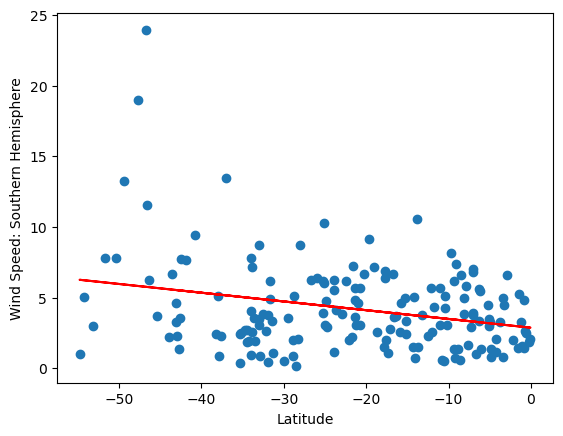

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
text_coordinates = (10,30)

plot_linear_regression(x_values, y_values, title="Wind Speed: Southern Hemisphere",
                       text_coordinates=text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [59]:
Discussion about the linear relationship: Wind Speeds have the tendency to be consistent throughout both hemispheres. 
    It seems that wind speeds are not affected by the latitude. 

SyntaxError: invalid syntax (2070618380.py, line 1)